In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np


SMALL_SIZE = 10
plt.rc('xtick', labelsize=SMALL_SIZE)

#challenge1
#s1=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt')
s2=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt')
s3=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt')
s4=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
#s5=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt')
df=pd.concat([s2,s3,s4], ignore_index=True)
df.columns = [column.strip() for column in df.columns]


#challenge2, included it in challenge 1 with parse_dates, but alternative method commmented below

df['datetime']=pd.to_datetime(df['DATE'] + ' ' + df['TIME'],format="%m/%d/%Y %H:%M:%S") ##combine date and time into one datetime column 
df.drop_duplicates(subset=['C/A','UNIT','SCP','STATION','DATE','TIME'],inplace=True) #Drop duplicates for turnstile, date, time 

#challenge3
df_turnstile=(df.groupby(['C/A','UNIT','SCP','STATION','DATE'], as_index=False).ENTRIES.first()) #find difference between ENTRIES to find how many actually entered thru each turnstile (every 4 hours) regardless of day  
df.head(10)

df_turnstile["PREV_DATE"] = (df_turnstile.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE"].apply(lambda grp: grp.shift(1)))
df_turnstile["PREV_ENTRIES"] = (df_turnstile.groupby(["C/A", "UNIT", "SCP", "STATION"])["ENTRIES"].apply(lambda grp: grp.shift(1)))
df_turnstile.head(12)

df_turnstile.dropna(subset=["PREV_ENTRIES"], axis=0, inplace=True) #drop rows with NaN value for Entries 

#finde turnstile counters with errors 
df_turnstile[df_turnstile["ENTRIES"]<df_turnstile["PREV_ENTRIES"]].head()

#function to deal with weird entries
def get_daily_count(row, max):
    clean_entries=row["ENTRIES"]-row['PREV_ENTRIES']
    if clean_entries<0:
        clean_entries=-clean_entries
    if clean_entries>max:
        clean_entries=min(row['ENTRIES'],row['PREV_ENTRIES'])
    return clean_entries 
df_turnstile["DAILY_ENTRIES"] = df_turnstile.apply(get_daily_count, axis=1, max=500000) 


#challenge4

mask2 =(df_turnstile['C/A']=='G001') & (df_turnstile['UNIT']=='R151') & (df_turnstile['SCP']=='00-00-00') & (df_turnstile['STATION']=='CONEY IS-STILLW') #pick a single turnstile 
df_turnstile2=df_turnstile[mask2].reset_index()
print(df_turnstile2.shape)
print(df_turnstile2)
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0,60,step=1), rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Total Entry by a Turnstile")
plt.plot(df_turnstile2['DATE'],df_turnstile2['DAILY_ENTRIES'])

#challenge5 
df_turnstile3=df_turnstile.groupby(['C/A','UNIT','STATION']).DAILY_ENTRIES.sum().reset_index()#sum by each ControlArea/Unit/Station
print(df_turnstile3.head())

#challenge6 
df_turnstile4=df_turnstile.groupby(['STATION','DATE']).DAILY_ENTRIES.sum().reset_index() #sum by station, daily
df_turnstile4['Date']=pd.to_datetime(df_turnstile4['DATE']) 
df_turnstile4['Day']=df_turnstile4['Date'].dt.dayofweek
df_turnstile4

#challenge7 
 x=df_turnstile4.STATION[50] #Pick a station
 df_turnstile5=df_turnstile4.loc[df_turnstile4["STATION"]==x].reset_index() 
 plt.figure(figsize=(15,5))
 plt.xticks(np.arange(0,60,step=1), rotation='vertical')
 plt.ylabel("Total Entry by Station")
 plt.xlabel("Date")
 plt.plot(df_turnstile5['DATE'],df_turnstile5['DAILY_ENTRIES'])

#challenge8
 dfturnstile5_week1=df_turnstile5[['DAILY_ENTRIES','Date','Day']].loc[range(0,7)] #isolate week1 
 dfturnstile5_week2=df_turnstile5[['DAILY_ENTRIES','Date','Day']].loc[range(7,14)] #isolate week2
 dfturnstile5_week3=df_turnstile5[['DAILY_ENTRIES','Date','Day']].loc[range(14,20)] #isolate week3 

 week1_count_list=dfturnstile5_week1.sort_values(by='Day').DAILY_ENTRIES.tolist() #sort by day (monday=0) and convert to list 
 week2_count_list=dfturnstile5_week2.sort_values(by='Day').DAILY_ENTRIES.tolist()
 week3_count_list=dfturnstile5_week3.sort_values(by='Day').DAILY_ENTRIES.tolist()

 plt.figure(figsize=(10,10))
 plt.plot(week1_count_list)
 plt.plot(week2_count_list)
 plt.plot(week3_count_list)

# #challenge9 
# #find stations with highest entries over the 3 weeks 
# df4.groupby("STATION").ENTRIES_diff_1.sum().sort_values(ascending=False)

# #challenge10
# #make historgram to show distribution of total ridership amongst stations
# total_ridership_counts=df4.groupby("STATION").ENTRIES_diff_1.sum().sort_values(ascending=False).tolist()
# plt.figure(figsize=(10,10))
# plt.ylabel("Number of Stations")
# plt.xlabel("Total Riders over May")
# plt.hist(total_ridership_counts)

In [11]:
df_turnstile.dropna(subset=["PREV_ENTRIES"], axis=0, inplace=True)
df_turnstile[df_turnstile["ENTRIES"]<df_turnstile["PREV_ENTRIES"]].head()


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1614,A025,R023,01-03-01,34 ST-HERALD SQ,05/05/2019,1238442706,05/04/2019,1.238445e+09
1615,A025,R023,01-03-01,34 ST-HERALD SQ,05/06/2019,1238440625,05/05/2019,1.238443e+09
1616,A025,R023,01-03-01,34 ST-HERALD SQ,05/07/2019,1238436896,05/06/2019,1.238441e+09
1617,A025,R023,01-03-01,34 ST-HERALD SQ,05/08/2019,1238432778,05/07/2019,1.238437e+09
1618,A025,R023,01-03-01,34 ST-HERALD SQ,05/09/2019,1238428687,05/08/2019,1.238433e+09


In [17]:
def get_daily_count(row, max):
    clean_entries=row["ENTRIES"]-row['PREV_ENTRIES']
    if clean_entries<0:
        clean_entries=-clean_entries
    if clean_entries>max:
        clean_entries=min(row['ENTRIES'],row['PREV_ENTRIES'])
    return clean_entries 
df_turnstile["DAILY_ENTRIES"] = df_turnstile.apply(get_daily_count, axis=1, max=500000)


(20, 10)
    index   C/A  UNIT       SCP          STATION        DATE  ENTRIES  \
0   14248  G001  R151  00-00-00  CONEY IS-STILLW  05/05/2019   999729   
1   14249  G001  R151  00-00-00  CONEY IS-STILLW  05/06/2019  1000331   
2   14250  G001  R151  00-00-00  CONEY IS-STILLW  05/07/2019  1001288   
3   14251  G001  R151  00-00-00  CONEY IS-STILLW  05/08/2019  1002264   
4   14252  G001  R151  00-00-00  CONEY IS-STILLW  05/09/2019  1003159   
5   14253  G001  R151  00-00-00  CONEY IS-STILLW  05/10/2019  1004042   
6   14254  G001  R151  00-00-00  CONEY IS-STILLW  05/11/2019  1004965   
7   14255  G001  R151  00-00-00  CONEY IS-STILLW  05/12/2019  1006126   
8   14256  G001  R151  00-00-00  CONEY IS-STILLW  05/13/2019  1006604   
9   14257  G001  R151  00-00-00  CONEY IS-STILLW  05/14/2019  1007415   
10  14258  G001  R151  00-00-00  CONEY IS-STILLW  05/15/2019  1008254   
11  14259  G001  R151  00-00-00  CONEY IS-STILLW  05/16/2019  1009261   
12  14260  G001  R151  00-00-00  CONEY IS-

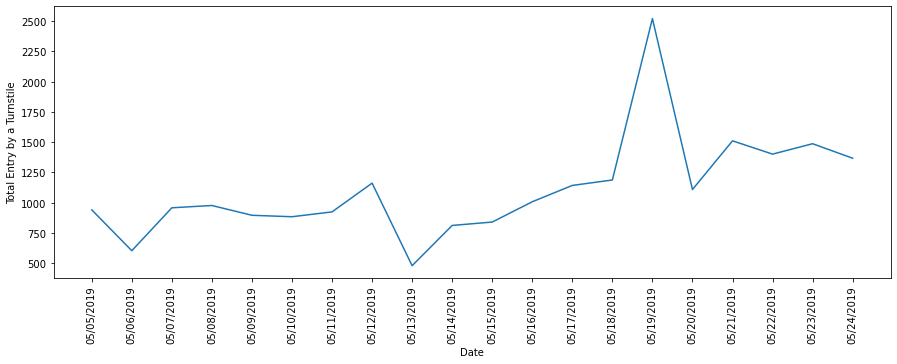

In [22]:
mask2 =(df_turnstile['C/A']=='G001') & (df_turnstile['UNIT']=='R151') & (df_turnstile['SCP']=='00-00-00') & (df_turnstile['STATION']=='CONEY IS-STILLW') #pick a single turnstile 
df_turnstile2=df_turnstile[mask2].reset_index()
print(df_turnstile2.shape)
print(df_turnstile2)
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0,60,step=1), rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Total Entry by a Turnstile")
plt.plot(df_turnstile2['DATE'],df_turnstile2['DAILY_ENTRIES'])


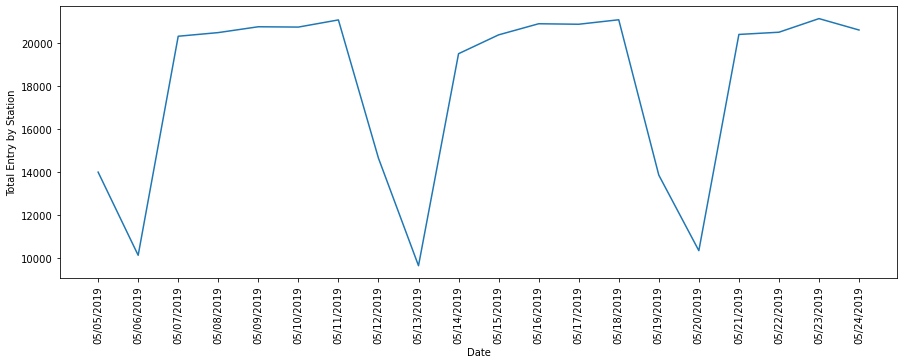

In [29]:
 x=df_turnstile4.STATION[50] #Pick a station
 df_turnstile5=df_turnstile4.loc[df_turnstile4["STATION"]==x].reset_index() 
 plt.figure(figsize=(15,5))
 plt.xticks(np.arange(0,60,step=1), rotation='vertical')
 plt.ylabel("Total Entry by Station")
 plt.xlabel("Date")
 plt.plot(df_turnstile5['DATE'],df_turnstile5['DAILY_ENTRIES'])

In [37]:
 dfturnstile5_week1=df_turnstile5[['DAILY_ENTRIES','Date','Day']].loc[range(0,7)] #isolate week1 
 dfturnstile5_week2=df_turnstile5[['DAILY_ENTRIES','Date','Day']].loc[range(7,14)] #isolate week2
 #dfturnstile5_week3=df_turnstile5[['DAILY_ENTRIES','Date','Day']].loc[range(14,21)] #isolate week3 

 week1_count_list=dfturnstile5_week1.sort_values(by='Day').DAILY_ENTRIES.tolist() #sort by day (monday=0) and convert to list 
 week2_count_list=dfturnstile5_week2.sort_values(by='Day').DAILY_ENTRIES.tolist()
 #week3_count_list=dfturnstile5_week3.sort_values(by='Day').DAILY_ENTRIES.tolist()


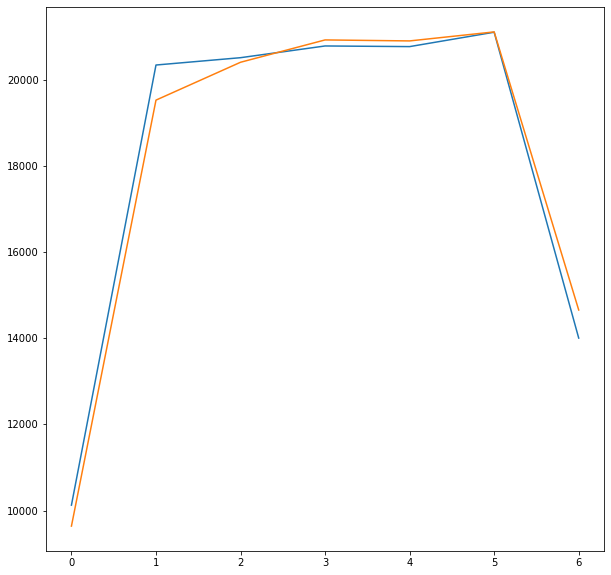

In [38]:
plt.figure(figsize=(10,10))
plt.plot(week1_count_list)
plt.plot(week2_count_list)
#plt.plot(week3_count_list)
